# Multi-Layer Perceptron For Heart Disease Prediction 

In [16]:
#Import the necessary libraries
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from MLPn2 import *


In [17]:
df=pd.read_csv("heart.csv.xls")

In [18]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [19]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [20]:
df.shape

(918, 12)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## Data Analysis

In [22]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases over Sex",
                 barmode="group")
fig.show()

In [23]:
fig=px.histogram(df,
                 x="Sex",
                 color = "Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [24]:
fig=px.histogram(df, 
                 x="Cholesterol",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Cholesterol respect to Sex",
                 barmode="group")
fig.show()

In [25]:
fig=px.histogram(df, 
                 x="Age",
                 color="HeartDisease",
                 hover_data=df.columns,
                 title="Distribution of Heart Disease respect to Age",
                 barmode="group")
fig.show()

## Data Preprocessing

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [27]:
print (df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [28]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Turning Categorical columns to Numerical 
df['Sex'] = le.fit_transform(df['Sex'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['Oldpeak'] = le.fit_transform(df['Oldpeak'])


In [30]:
df.dtypes

Age               int64
Sex               int64
ChestPainType     int64
RestingBP         int64
Cholesterol       int64
FastingBS         int64
RestingECG        int64
MaxHR             int64
ExerciseAngina    int64
Oldpeak           int64
ST_Slope          int64
HeartDisease      int64
dtype: object

In [31]:
x = df[["Age", "Sex","ChestPainType","RestingBP", "Cholesterol", "FastingBS",
        "RestingECG","MaxHR","ExerciseAngina" ,"Oldpeak","ST_Slope"]]
y = df["HeartDisease"]
x.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,10,2
1,49,0,2,160,180,0,1,156,0,20,1
2,37,1,1,130,283,0,2,98,0,10,2
3,48,0,0,138,214,0,1,108,1,25,1
4,54,1,2,150,195,0,1,122,0,10,2


In [32]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [33]:
X = x.to_numpy()
Y = y.to_numpy().reshape(918,1)
X[0:9], Y[0:9]

(array([[ 40,   1,   1, 140, 289,   0,   1, 172,   0,  10,   2],
        [ 49,   0,   2, 160, 180,   0,   1, 156,   0,  20,   1],
        [ 37,   1,   1, 130, 283,   0,   2,  98,   0,  10,   2],
        [ 48,   0,   0, 138, 214,   0,   1, 108,   1,  25,   1],
        [ 54,   1,   2, 150, 195,   0,   1, 122,   0,  10,   2],
        [ 39,   1,   2, 120, 339,   0,   1, 170,   0,  10,   2],
        [ 45,   0,   1, 130, 237,   0,   1, 170,   0,  10,   2],
        [ 54,   1,   1, 110, 208,   0,   1, 142,   0,  10,   2],
        [ 37,   1,   0, 140, 207,   0,   1, 130,   1,  25,   1]]),
 array([[0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1]]))

### Experimenting with different Scalers

In [34]:
X = x.to_numpy()
min_max_scaler = MinMaxScaler()
sc= StandardScaler()
x_scaled = sc.fit_transform(X)
#x_scaled = min_max_scaler.fit_transform(X)
Y = y.to_numpy().reshape(918,1)
x_scaled[0:5], Y[0:5]

(array([[-1.4331398 ,  0.51595242,  0.22903206,  0.41090889,  0.82507026,
         -0.55134134,  0.01725451,  1.38292822, -0.8235563 , -0.87246276,
          1.05211381],
        [-0.47848359, -1.93816322,  1.27505906,  1.49175234, -0.17196105,
         -0.55134134,  0.01725451,  0.75415714, -0.8235563 ,  0.12037326,
         -0.59607813],
        [-1.75135854,  0.51595242,  0.22903206, -0.12951283,  0.7701878 ,
         -0.55134134,  1.60121899, -1.52513802, -0.8235563 , -0.87246276,
          1.05211381],
        [-0.5845565 , -1.93816322, -0.81699495,  0.30282455,  0.13903954,
         -0.55134134,  0.01725451, -1.13215609,  1.21424608,  0.61679126,
         -0.59607813],
        [ 0.05188098,  0.51595242,  1.27505906,  0.95133062, -0.0347549 ,
         -0.55134134,  0.01725451, -0.5819814 , -0.8235563 , -0.87246276,
          1.05211381]]),
 array([[0],
        [1],
        [0],
        [1],
        [0]]))

In [35]:
Y.shape

(918, 1)

+ One-hot encoding of the target variable y was performed to facilitate the use of appropriate loss functions, such as cross-entropy, in the project. By representing the categorical classes as binary vectors, the model can calculate and optimize the loss based on the predicted probabilities for each class and the true class labels.

+ [1. 0.] indicates that the true class of the first sample is the first class (or class 0)
+ [0. 1.] indicates that the true class of the second sample is the second class (or class 1)

In [21]:
# Create the encoder
encoder = OneHotEncoder()

# Fit and transform the target variable
y_encoded = encoder.fit_transform(Y).toarray()

In [22]:
print (y_encoded)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [23]:
y_encoded.shape

(918, 2)

In [24]:
#x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=42)

x_train.shape , x_test.shape, y_train.shape, y_test.shape

((734, 11), (184, 11), (734, 2), (184, 2))

### Training the Model & Comparing How Different Loss and Activation Functions Affects the Accuracy 

In [25]:
topology = np.array([11, 5, 3, 2])

# Experiment with different activation function and loss function combinations
activationFunctions = ['sigmoid', 'relu', 'linear']
lossFunctions = ['meansquared', 'crossentropy']

for activationFunction in activationFunctions:
    for lossFunction in lossFunctions:
        MLPn2 = MultiLayerPerceptron(topology, lossFunction, activationFunction)
        MLPn2.learn(x_train, y_train, learningRate=0.01, numberOfEpochs=20)
        MLPn2.summary()


Mean error in epoch 0 : 0.3190585229150545
Mean error in epoch 1 : 0.2737290110413759
Mean error in epoch 2 : 0.25218791995280126
Mean error in epoch 3 : 0.24830636156954508
Mean error in epoch 4 : 0.24782888514761453
Mean error in epoch 5 : 0.24786723182638068
Mean error in epoch 6 : 0.24781966910849484
Mean error in epoch 7 : 0.24774965464566323
Mean error in epoch 8 : 0.2475892154504564
Mean error in epoch 9 : 0.24763535561264383
Mean error in epoch 10 : 0.2475629568026826
Mean error in epoch 11 : 0.24744412065542795
Mean error in epoch 12 : 0.24742825707045515
Mean error in epoch 13 : 0.24732580568071635
Mean error in epoch 14 : 0.24723977339592645
Mean error in epoch 15 : 0.2470433914772601
Mean error in epoch 16 : 0.24699675974130078
Mean error in epoch 17 : 0.2467829039580134
Mean error in epoch 18 : 0.24674009645230677
Mean error in epoch 19 : 0.24646280795625436
training has been finished ...
---------------------------------
Structure: 
Layer 0:
  Number of Neurons: 11
  Acti

### Calculate and Plot the Accuracy 

+ The performance metric used is accuracy, which is calculated by comparing the predicted labels with the true labels and taking the mean of the comparison results.

Mean error in epoch 0 : 0.327545827441095
Mean error in epoch 1 : 0.27974447294755816
Mean error in epoch 2 : 0.25211027221454363
Mean error in epoch 3 : 0.24709779066079968
Mean error in epoch 4 : 0.24648131133491724
Mean error in epoch 5 : 0.24637542951642102
Mean error in epoch 6 : 0.24618648383225747
Mean error in epoch 7 : 0.24596859546272404
Mean error in epoch 8 : 0.24567998993258508
Mean error in epoch 9 : 0.24544959555729381
Mean error in epoch 10 : 0.24512791581339077
Mean error in epoch 11 : 0.24458635387558658
Mean error in epoch 12 : 0.24433159787154565
Mean error in epoch 13 : 0.24393782201585068
Mean error in epoch 14 : 0.2436637175733577
Mean error in epoch 15 : 0.24306118680009992
Mean error in epoch 16 : 0.24261613071713561
Mean error in epoch 17 : 0.24199389959801407
Mean error in epoch 18 : 0.24142431616500004
Mean error in epoch 19 : 0.24058204541716963
Mean error in epoch 20 : 0.23992539420524964
Mean error in epoch 21 : 0.23888020904735432
Mean error in epoch 22 

Mean error in epoch 183 : 0.10030801165636798
Mean error in epoch 184 : 0.10025009531773041
Mean error in epoch 185 : 0.1001834280820381
Mean error in epoch 186 : 0.10013003396089988
Mean error in epoch 187 : 0.10004599234706078
Mean error in epoch 188 : 0.10001623725591947
Mean error in epoch 189 : 0.09995106980808433
Mean error in epoch 190 : 0.09986228502990893
Mean error in epoch 191 : 0.09983508023031731
Mean error in epoch 192 : 0.09977036638234688
Mean error in epoch 193 : 0.09970768437456526
Mean error in epoch 194 : 0.09962454260190778
Mean error in epoch 195 : 0.0995785253828978
Mean error in epoch 196 : 0.09951186307350374
Mean error in epoch 197 : 0.09944283031721425
Mean error in epoch 198 : 0.09932998387035324
Mean error in epoch 199 : 0.09933022152722691
training has been finished ...
Mean error in epoch 0 : 0.6905594685088166
Mean error in epoch 1 : 0.6876880359611629
Mean error in epoch 2 : 0.6868798517431435
Mean error in epoch 3 : 0.6818382979474555
Mean error in epo

Mean error in epoch 167 : 0.2813541179162037
Mean error in epoch 168 : 0.28044409179363217
Mean error in epoch 169 : 0.2819442909086104
Mean error in epoch 170 : 0.28081705751778546
Mean error in epoch 171 : 0.2808833807410603
Mean error in epoch 172 : 0.28031160050523735
Mean error in epoch 173 : 0.27356062785751667
Mean error in epoch 174 : 0.280887783128225
Mean error in epoch 175 : 0.2795787039968072
Mean error in epoch 176 : 0.2794657596599615
Mean error in epoch 177 : 0.27867276737647206
Mean error in epoch 178 : 0.2777838766624355
Mean error in epoch 179 : 0.27795325195248155
Mean error in epoch 180 : 0.27715487417574497
Mean error in epoch 181 : 0.27848442686624886
Mean error in epoch 182 : 0.27535815401080743
Mean error in epoch 183 : 0.2771349083897935
Mean error in epoch 184 : 0.2766752400364142
Mean error in epoch 185 : 0.27531340718474206
Mean error in epoch 186 : 0.27314833127506083
Mean error in epoch 187 : 0.27574640989556476
Mean error in epoch 188 : 0.2754579332976549

Mean error in epoch 149 : 0.08234739509318878
Mean error in epoch 150 : 0.0819664466043195
Mean error in epoch 151 : 0.08224089405889
Mean error in epoch 152 : 0.08146511277020187
Mean error in epoch 153 : 0.08265658013191392
Mean error in epoch 154 : 0.08124003997232337
Mean error in epoch 155 : 0.08189265326381116
Mean error in epoch 156 : 0.08044131053717739
Mean error in epoch 157 : 0.08144159901239316
Mean error in epoch 158 : 0.08180329143446426
Mean error in epoch 159 : 0.08145663729209142
Mean error in epoch 160 : 0.0808488031254724
Mean error in epoch 161 : 0.0811696748200824
Mean error in epoch 162 : 0.08198427552077998
Mean error in epoch 163 : 0.08093014356114463
Mean error in epoch 164 : 0.08073071425765663
Mean error in epoch 165 : 0.08126778310846812
Mean error in epoch 166 : 0.08109797770694445
Mean error in epoch 167 : 0.08132829617502459
Mean error in epoch 168 : 0.08106948643779012
Mean error in epoch 169 : 0.08102096485106754
Mean error in epoch 170 : 0.080057009417

Mean error in epoch 131 : 0.284412081148499
Mean error in epoch 132 : 0.28017414988798467
Mean error in epoch 133 : 0.286362043611741
Mean error in epoch 134 : 0.28163392464266984
Mean error in epoch 135 : 0.2861571036225751
Mean error in epoch 136 : 0.2769396885251249
Mean error in epoch 137 : 0.2828839207373994
Mean error in epoch 138 : 0.2811678600691557
Mean error in epoch 139 : 0.27733645034181564
Mean error in epoch 140 : 0.2802194151080239
Mean error in epoch 141 : 0.27998296109701537
Mean error in epoch 142 : 0.2780677799383902
Mean error in epoch 143 : 0.2816135509893718
Mean error in epoch 144 : 0.277083779429106
Mean error in epoch 145 : 0.27701333405833267
Mean error in epoch 146 : 0.2793620952276308
Mean error in epoch 147 : 0.2709965408886062
Mean error in epoch 148 : 0.278738517698489
Mean error in epoch 149 : 0.282643042077732
Mean error in epoch 150 : 0.2712299937728033
Mean error in epoch 151 : 0.27279196627999225
Mean error in epoch 152 : 0.26988605280265293
Mean err

Mean error in epoch 113 : 0.11973687902798459
Mean error in epoch 114 : 0.12098585459568884
Mean error in epoch 115 : 0.1204111442719202
Mean error in epoch 116 : 0.11985715677656848
Mean error in epoch 117 : 0.11906258683213253
Mean error in epoch 118 : 0.1207337615497808
Mean error in epoch 119 : 0.11994907648955158
Mean error in epoch 120 : 0.11919868888230001
Mean error in epoch 121 : 0.12019525084539327
Mean error in epoch 122 : 0.12071866943871264
Mean error in epoch 123 : 0.120641946706965
Mean error in epoch 124 : 0.12057328581483097
Mean error in epoch 125 : 0.1201072664274689
Mean error in epoch 126 : 0.11870490103023358
Mean error in epoch 127 : 0.12008443831735946
Mean error in epoch 128 : 0.12029428549512872
Mean error in epoch 129 : 0.11969535746886947
Mean error in epoch 130 : 0.1203607727904468
Mean error in epoch 131 : 0.12003928467789952
Mean error in epoch 132 : 0.12036381678597279
Mean error in epoch 133 : 0.11963234279078111
Mean error in epoch 134 : 0.120427382875

Mean error in epoch 95 : 0.36075649199993615
Mean error in epoch 96 : 0.363483309147802
Mean error in epoch 97 : 0.36344035507490513
Mean error in epoch 98 : 0.3633965185936815
Mean error in epoch 99 : 0.36337464392989277
Mean error in epoch 100 : 0.36098744133197425
Mean error in epoch 101 : 0.363119099016086
Mean error in epoch 102 : 0.3580350083987996
Mean error in epoch 103 : 0.3632392111625179
Mean error in epoch 104 : 0.35724251602318474
Mean error in epoch 105 : 0.3633257009808308
Mean error in epoch 106 : 0.36322421808373834
Mean error in epoch 107 : 0.3640996697521149
Mean error in epoch 108 : 0.35993957923966075
Mean error in epoch 109 : 0.3612126197883673
Mean error in epoch 110 : 0.36177005309984567
Mean error in epoch 111 : 0.3544570861850073
Mean error in epoch 112 : 0.36593663473110727
Mean error in epoch 113 : 0.3611640272010479
Mean error in epoch 114 : 0.3629054855107424
Mean error in epoch 115 : 0.36273387975434984
Mean error in epoch 116 : 0.3646380860478365
Mean er

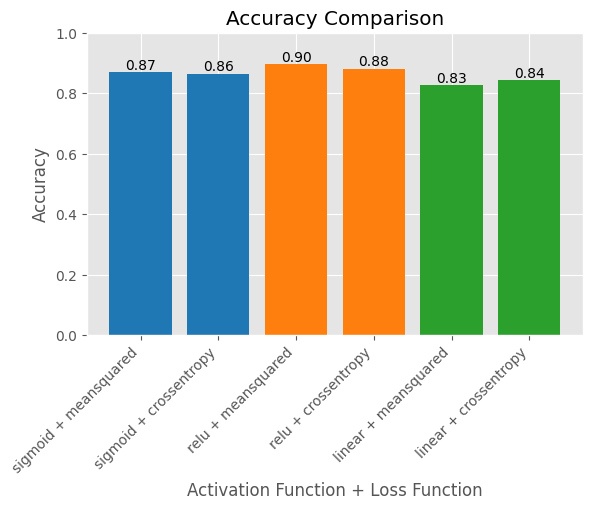

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def calculate_accuracy(model, x_test, y_test):
    # Predict the labels for the test data
    predictions = model.predictAll(x_test)
    
    # Convert the predicted labels and true labels to their respective classes
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_test, axis=1)
    
    # Calculate the accuracy by comparing the predicted labels with the true labels
    accuracy = np.mean(predicted_labels == true_labels)
    return accuracy,predicted_labels,true_labels

# Define the network topology, activation functions, and loss functions
topology = np.array([11,5,3,2])
activationFunctions = ['sigmoid', 'relu', 'linear']
lossFunctions = ['meansquared', 'crossentropy']
accuracies = []

# Define an empty confusion matrix
confusion_mat = np.zeros((2, 2))


# Iterate through each combination of activation and loss functions
for activationFunction in activationFunctions:
    for lossFunction in lossFunctions:
        # Create an MLPn2 object with the specified activation and loss functions
        MLPn2 = MultiLayerPerceptron(topology, lossFunction, activationFunction)
        
        # Train the model on the training data for one epoch
        MLPn2.learn(x_train, y_train, learningRate= 0.01, numberOfEpochs= 200)
        
        # Calculate the accuracy of the model on the test data
        accuracy , predicted_labels, true_labels= calculate_accuracy(MLPn2, x_test, y_test)
        
        # Append the accuracy to the accuracies list
        accuracies.append(accuracy)
        
        # Update the confusion matrix
        confusion_mat += confusion_matrix(true_labels, predicted_labels)
        


# Plotting the accuracies
x_labels = [f'{activation} + {loss}' for activation in activationFunctions for loss in lossFunctions]

# Specify the colors for the bars to group them based on activation function
colors = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange', 'tab:green', 'tab:green']

# Create a bar plot with the accuracies
plt.bar(x_labels, accuracies, color=colors)
plt.xlabel('Activation Function + Loss Function')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Adjust the position of the labels to avoid overlapping
plt.subplots_adjust(bottom=0.25)

# Add labels to the bars displaying the accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

# Display the plot
plt.show()


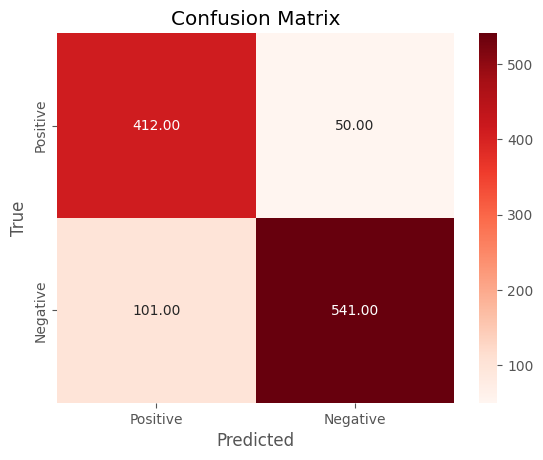

In [28]:
# Plot the confusion matrix
labels = ['Positive', 'Negative']
sns.heatmap(confusion_mat, annot=True, fmt='.2f', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

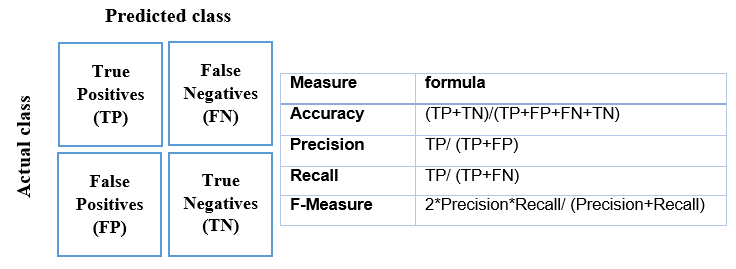

## Experimenting with Neural Network Topology 

After various experimentations for our problem and data, Topology of [11,5,3,2] gave the best results. But we also wanted to showcase how different Neural Network Topology can affect the accuracy of the model. Here we showed one with really basic architecture and also the one with more complex.


#### Topology [11,1,1,2]

+ The accuracy of the model varied significantly depending on the network topology. The topology [11, 1, 1, 2] resulted in a significant drop in accuracy for "sigmoid + meansquared" combination compared to other topologies tested.Other models accuracy didn't affected much which is can seen from the graph. The choice of sigmoid activation function and mean squared loss function may not be suitable for the given problem. 

+ Complexity of the network: The topology [11, 1, 1, 2] represents a network with only 2 neurons in the output layer. This limited capacity may not be sufficient to capture the complexity of the problem, resulting in a decrease in accuracy.

+ Underfitting: The network is underfitting the data, meaning it is not able to capture the underlying patterns and relationships present in the dataset.This happens because the network is too simple and lacks the necessary complexity to model the data accurately. 

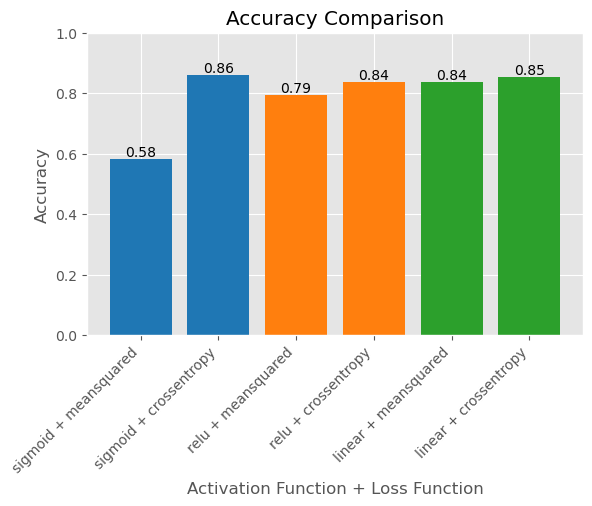

#### Topology [11,13,11,9,2]

+ Overfitting: In our case The more complex topology have a higher risk of overfitting the training data. Overfitting occurs when the model becomes too specialized in the training data and fails to generalize well to unseen data. This can lead to a drop in accuracy when evaluated on the test data. The drop in accuracy observed in combinations of s+m,r+m ,r+c,l+m .

+ Model Complexity: A more complex topology introduces more parameters and complexity into the model. With additional layers and neurons, the model has the potential to capture more complicated patterns and relationships in the data. However, if the complexity exceeds the level necessary for the given problem, it can lead to increased noise sensitivity and decreased generalization performance which is what we observe here.

+ Insufficient Training Data: The other reason is that the observed decrease in accuracy with the more complex topology is due to limited training data. Complex models typically require a larger amount of diverse training data to effectively learn and generalize.In our case available training data is not sufficient, thus the model struggle to capture the complexity and exhibit lower performance.

+ Activation Functions and Loss Functions: The performance variation across different activation and loss function combinations attributed to how they interact with the complexity of the model. Certain activation functions and loss functions performs better to handle the increased complexity and prevent overfitting, resulting in more stable performance. In this case, the combinations with the sigmoid or linear activation functions and the cross-entropy loss function exhibited more consistent performance, indicating their ability to handle the complexity of the model effectively.

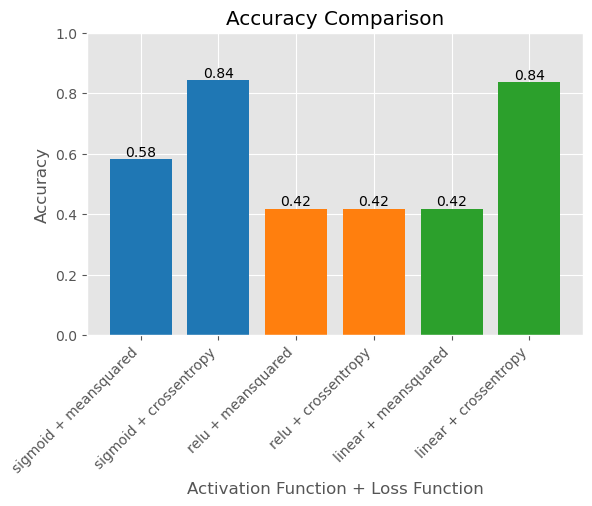

+ Based on these observations, it is evident that the choice of network topology and activation/loss function can have a significant impact on the performance of the neural network. Experimenting with different configurations is crucial to find the optimal combination that yields the highest accuracy for a given problem.

## Experimenting with Learning Rate

The learning rate is a hyperparameter that determines the step size at which the model's parameters (weights and biases) are updated during the training process. It plays a crucial role in determining how quickly or slowly the model converges to an optimal solution.

+ For our model and problem, learning rate 0.01 was the best performing rate but we also wanted to see how does different learning rate affects the performance of the model.
+ To show this we choosed two learning rates one is much smaller and one is considerably higher and we keept all other parameters same. So only thing that is affecting the performance of the model will be the learning rate. 

#### Learning Rate = 0.0001

Using a very small learning rate, such as 0.0001, leads to slow convergence and poor model performance.

+ Slow convergence: With a small learning rate, the model updates its parameters very slowly. This slow update process can prolong the convergence time, requiring more training iterations to reach an optimal solution. As a result, the model does not have enough training time to learn meaningful patterns from the data, leading to lower accuracy.

+ Limited exploration: A small learning rate restricts the model's exploration of the parameter space. It takes smaller steps during the optimization process, potentially missing out on important regions of the parameter space that can lead to higher accuracy. This limited exploration hinders the model's ability to find the optimal solution.

+ It looks like that the linear and relu activation functions are more resilient to the small learning rate and still converged to a reasonable solution, while sigmoid struggled to converge effectively.

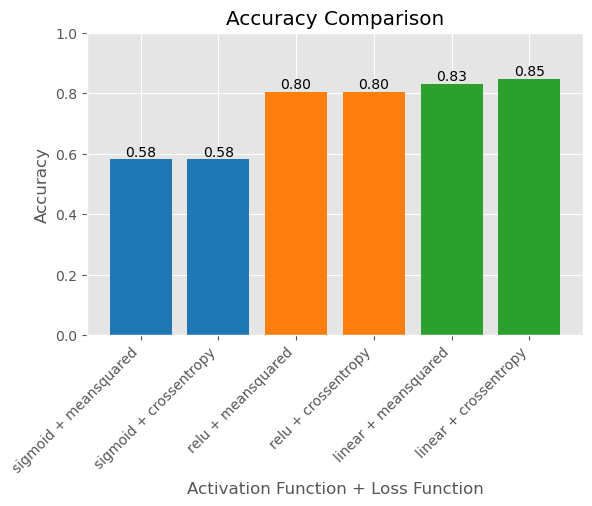

#### Learning Rate = 1

In general high learning rate increases the risk of overshooting the optimal weights. If the updates are too large, the model jumps over the optimal solution and fails to converge. This leads to unstable training and poor performance.

+ In our case Sigmoid function still managed to converge reasonable accuracy rates but relu and linear activation functions performed significantly worse.

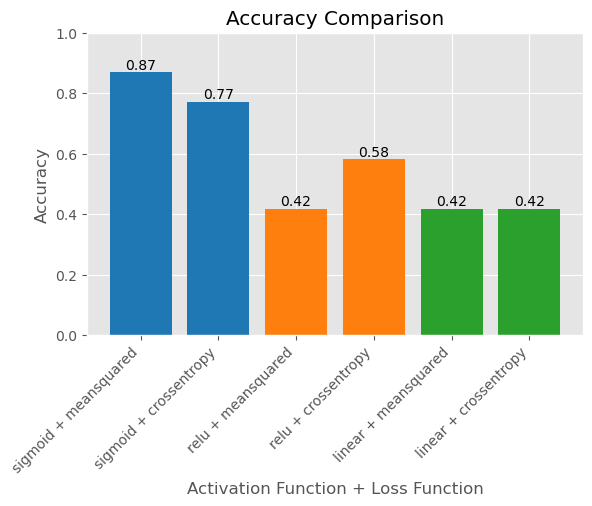

It's important to note that the optimal learning rate value depends on the specific problem, dataset, and model architecture. While a high learning rate can accelerate learning initially, it requires careful tuning and monitoring to prevent negative impacts such as overshooting or divergence.